In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import anndata
from matplotlib import pylab
from pylab import *

In [5]:
adata = sc.read_h5ad("/home/rhahuja/e3a1c03b-a8f1-5099-8805-fee0ffec828e/spleen.cellxgene.h5ad")
adata

AnnData object with n_obs × n_vars = 94257 × 22612
    obs: 'Donor', 'Time', 'donor_time', 'organ', 'patient', 'sample', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Celltypes_GenomeBiol_2019', 'Celltypes_updated_July_2020'
    var: 'gene_ids-HCATisStab7463846', 'gene_ids-HCATisStab7463847', 'gene_ids-HCATisStab7463848', 'gene_ids-HCATisStab7463849', 'gene_ids-HCATisStab7587200', 'gene_ids-HCATisStab7587203', 'gene_ids-HCATisStab7587206', 'gene_ids-HCATisStab7587209', 'gene_ids-HCATisStabAug177078016', 'gene_ids-HCATisStabAug177078017', 'gene_ids-HCATisStabAug177078018', 'gene_ids-HCATisStabAug177078019', 'gene_ids-HCATisStabAug177276391', 'gene_ids-HCATisStabAug177276392', 'gene_ids-HCATisStabAug177276394', 'gene_ids-HCATisStabAug177376561', 'gene_ids-HCATisStabAug177376563', 'gene_ids-HCATisStabAug177376565', 'gene_ids-HCATisStabAug177376567', 'n_cells'
    uns: 'Celltypes_colors', 'Celltypes_updated_July_2020_colors', 'Celltypes_updated_july_2020_colors'
    obsm: 'X_pca', 'X_u

In [7]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) # normalize to 10,000 reads/cell
sc.pp.log1p(adata)

In [8]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_var = adata[:, adata.var["highly_variable"]]

In [15]:
adata_var

AnnData object with n_obs × n_vars = 94257 × 1725
    obs: 'Donor', 'Time', 'donor_time', 'organ', 'patient', 'sample', 'n_genes', 'percent_mito', 'n_counts', 'leiden', 'Celltypes_GenomeBiol_2019', 'Celltypes_updated_July_2020'
    var: 'gene_ids-HCATisStab7463846', 'gene_ids-HCATisStab7463847', 'gene_ids-HCATisStab7463848', 'gene_ids-HCATisStab7463849', 'gene_ids-HCATisStab7587200', 'gene_ids-HCATisStab7587203', 'gene_ids-HCATisStab7587206', 'gene_ids-HCATisStab7587209', 'gene_ids-HCATisStabAug177078016', 'gene_ids-HCATisStabAug177078017', 'gene_ids-HCATisStabAug177078018', 'gene_ids-HCATisStabAug177078019', 'gene_ids-HCATisStabAug177276391', 'gene_ids-HCATisStabAug177276392', 'gene_ids-HCATisStabAug177276394', 'gene_ids-HCATisStabAug177376561', 'gene_ids-HCATisStabAug177376563', 'gene_ids-HCATisStabAug177376565', 'gene_ids-HCATisStabAug177376567', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Celltypes_colors', 'Celltypes_updated_July_2020_colors'

In [ ]:
sc.pp.regress_out(adata_var, ['n_counts'])

In [ ]:
sc.pp.regress_out(adata_var, ['percent_mito'])

In [ ]:
sc.pp.regress_out(adata_var, ['Donor'])

In [ ]:
sc.pp.neighbors(adata_var, n_neighbors=4)
sc.tl.umap(adata_var)

In [ ]:
sc.tl.leiden(adata_var, resolution=0.9)

Trying to set attribute `.uns` of view, copying.


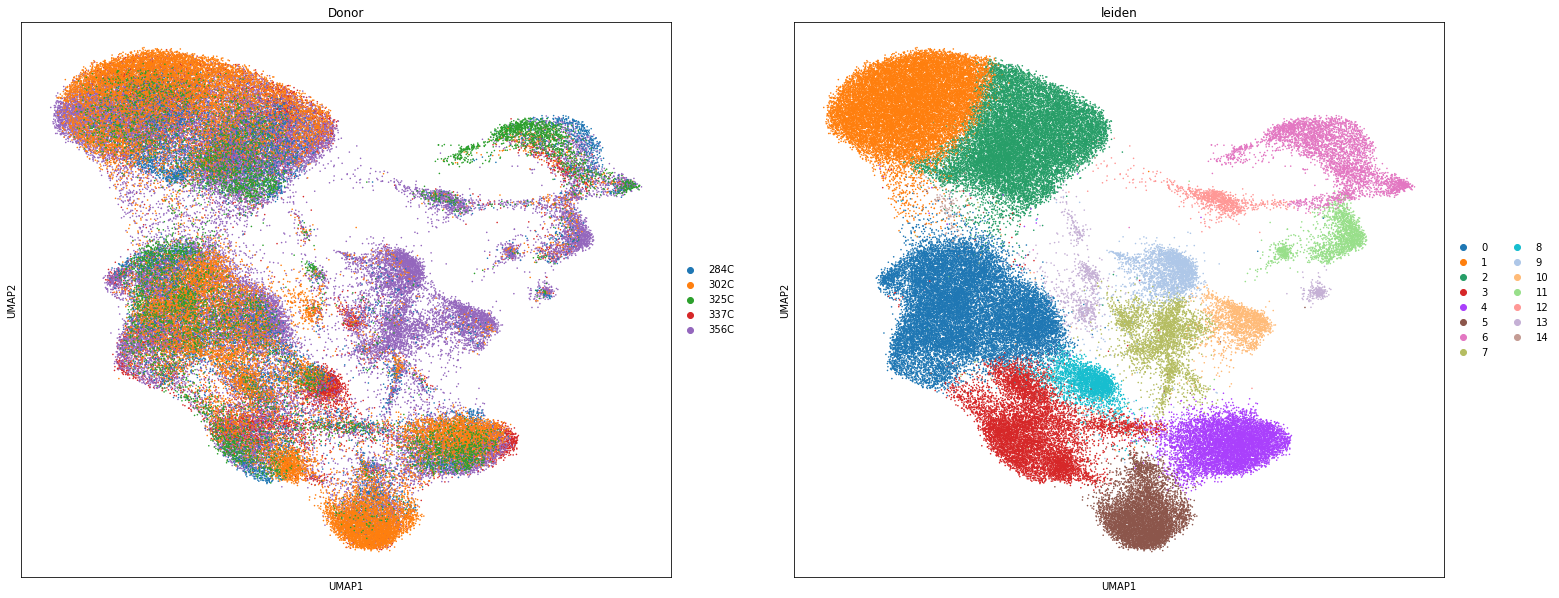

In [13]:
pylab.rcParams['figure.figsize'] = (12, 10)

sc.pl.umap(adata_var,color=['Donor','leiden'], size=10)

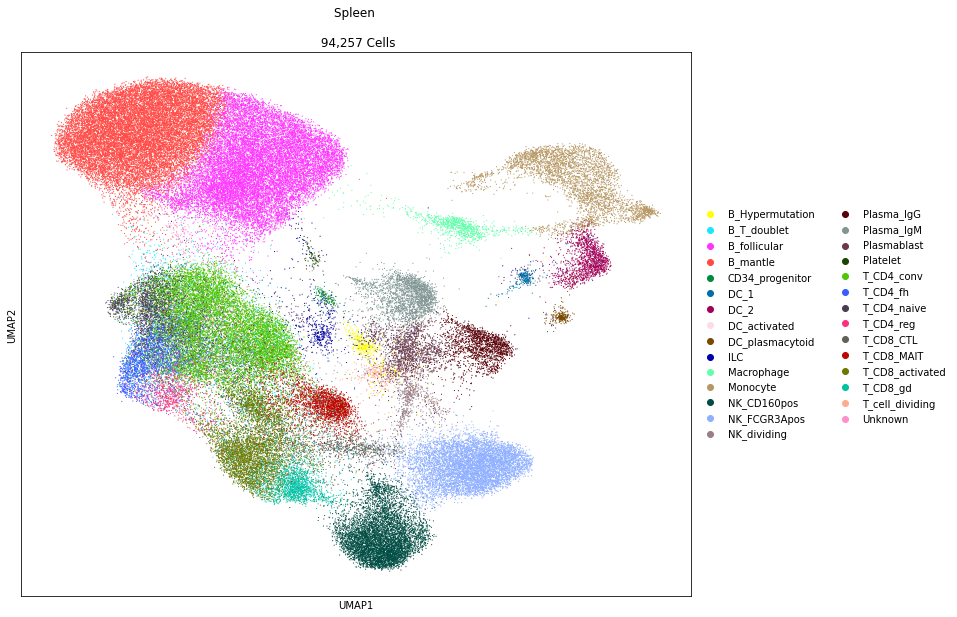

In [136]:
pylab.rcParams['figure.figsize'] = (12, 10)
sc.pl.umap(adata_var,color=['Celltypes_GenomeBiol_2019'], size=5, title = "Spleen \n\n 94,257 Cells") 

In [19]:
adata_var.obs

,Donor,Time,donor_time,organ,patient,sample,n_genes,percent_mito,n_counts,leiden,Celltypes_GenomeBiol_2019,Celltypes_updated_July_2020
index,,,,,,,,,,,,
AAACCTGCACATTTCT-1-HCATisStab7463846,337C,0h,337C_0h,Spleen,337C,HCATisStab7463846,1118.0,0.049418,10000.051758,8,T_CD8_MAIT,T_CD8_MAIT
AAACCTGCACCGCTAG-1-HCATisStab7463846,337C,0h,337C_0h,Spleen,337C,HCATisStab7463846,1212.0,0.042230,9999.990234,5,NK_CD160pos,NK_CD160pos
AAACCTGCAGTCCTTC-1-HCATisStab7463846,337C,0h,337C_0h,Spleen,337C,HCATisStab7463846,1294.0,0.021068,10000.044922,3,T_CD8_activated,T_CD8_activated
AAACCTGCATTGGCGC-1-HCATisStab7463846,337C,0h,337C_0h,Spleen,337C,HCATisStab7463846,1058.0,0.040489,10000.036133,1,B_mantle,B_naive
AAACCTGCATTTCACT-1-HCATisStab7463846,337C,0h,337C_0h,Spleen,337C,HCATisStab7463846,1122.0,0.093977,9999.937500,5,NK_CD160pos,NK_CD160pos
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCGTCTGCAAT-1-HCATisStabAug177376567,325C,72h,325C_72h,Spleen,325C,HCATisStabAug177376567,1226.0,0.038708,10000.024414,2,B_follicular,B_mature
TTTGCGCGTGACCAAG-1-HCATisStabAug177376567,325C,72h,325C_72h,Spleen,325C,HCATisStabAug177376567,1770.0,0.055751,9999.999023,2,B_follicular,B_mature
TTTGCGCTCTCGTTTA-1-HCATisStabAug177376567,325C,72h,325C_72h,Spleen,325C,HCATisStabAug177376567,542.0,0.082334,9999.988281,1,B_mantle,B_naive


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Cell type proportions per sample,284C_T0,0.2180,0,0.1206,0.0029,0.0005,0.0019,0.0121,0.0010,0.0034,...,0.2030,0.0107,0.0160,0.0116,0.0441,0.0300,0.0422,0.0494,0.0048,0
Unnamed: 21,284C_12h,0.0483,0.0014,0.0583,0.0007,0,0.0021,0.0128,0,0.0085,...,0.1869,0.0739,0.0163,0.0341,0.1102,0.0313,0.0569,0.0498,0.0028,0
Unnamed: 22,284C_24h,0.2574,0,0.1632,0.0049,0.0015,0.0010,0.0102,0.0010,0.0029,...,0.1384,0.0311,0.0175,0.0097,0.0622,0.0364,0.0209,0.0355,0.0049,0
Unnamed: 23,284C_72h,0.3287,0.0011,0.1945,0.0022,0.0028,0.0017,0.0066,0.0011,0,...,0.0713,0.0105,0.0785,0.0061,0.0376,0.0133,0.0309,0.0260,0.0017,0.0006


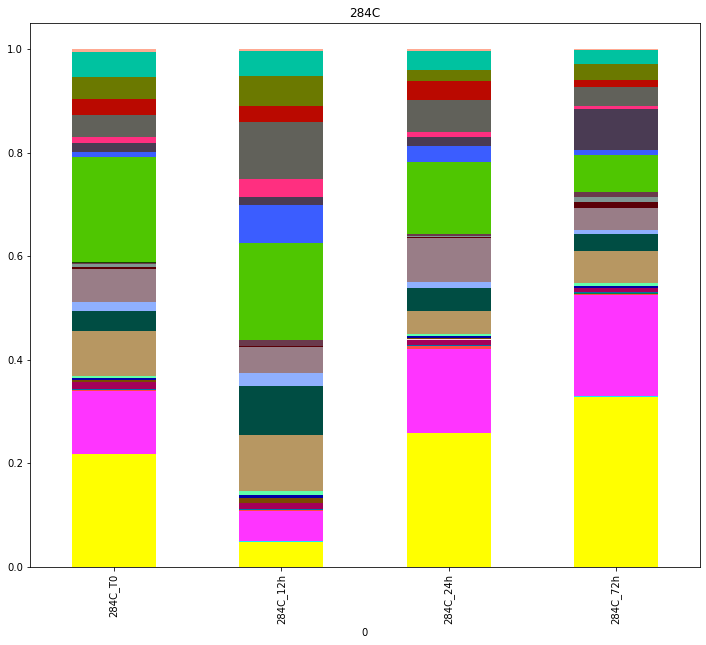

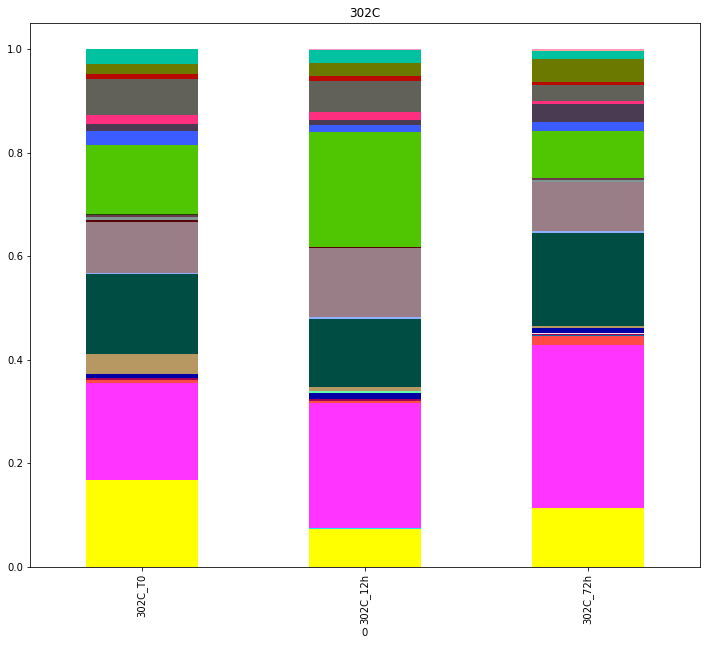

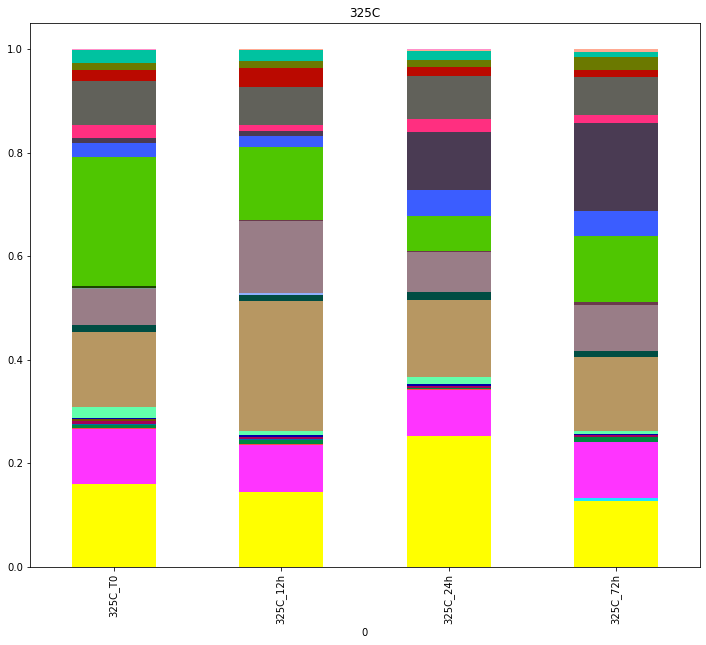

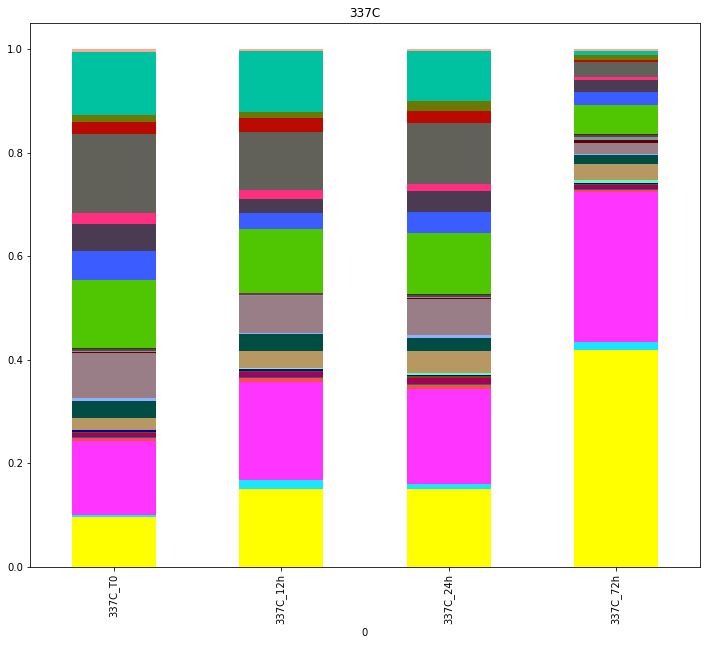

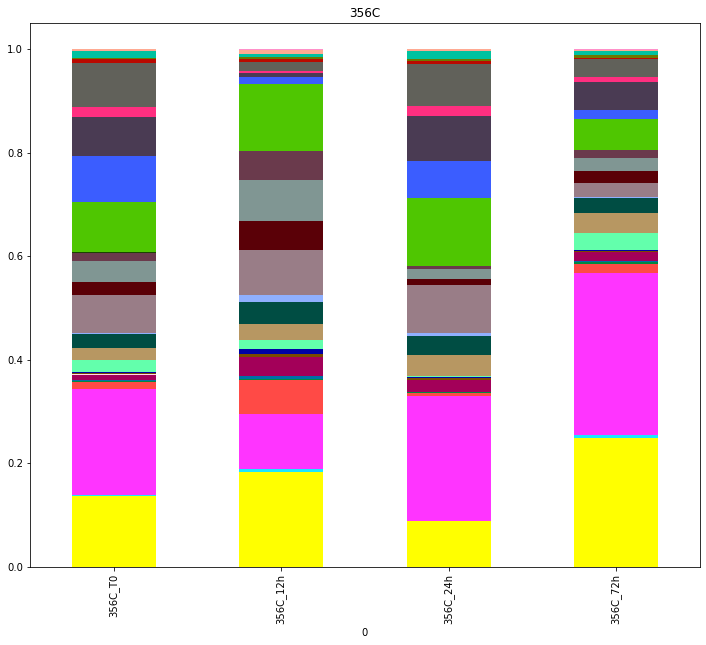

In [128]:
df_new = pd.read_excel("/home/rhahuja/e3a1c03b-a8f1-5099-8805-fee0ffec828e/13059_2019_1906_MOESM3_ESM.xls", sheet_name = 2)
df_labels = df_new[["Unnamed: 0"]].to_numpy()
df_new = df_new.iloc[:, 20:39]
df_new.insert(0, "Cell Types", df_labels, True)
df_284C = df_new.iloc[:,1:5]
df_302C = df_new.iloc[:,5:8]
df_325C = df_new.iloc[:,8:12]
df_337C = df_new.iloc[:,12:16]
df_356C = df_new.iloc[:,16:20]
df_284C = df_284C.T
df_284C.set_index(0)
df_302C = df_302C.T
df_302C.set_index(0)
df_325C = df_325C.T
df_325C.set_index(0)
df_337C = df_337C.T
df_337C.set_index(0)
df_356C = df_356C.T
df_356C.set_index(0)
df_284C.plot(x=0, kind='bar', stacked=True, title='284C', legend = False, color = adata.uns['Celltypes_GenomeBiol_2019_colors'])#, color = df_new['colors'])
df_302C.plot(x=0, kind='bar', stacked=True, title='302C', legend = False, color = adata.uns['Celltypes_GenomeBiol_2019_colors'])
df_325C.plot(x=0, kind='bar', stacked=True, title='325C', legend = False, color = adata.uns['Celltypes_GenomeBiol_2019_colors'])
df_337C.plot(x=0, kind='bar', stacked=True, title='337C', legend = False, color = adata.uns['Celltypes_GenomeBiol_2019_colors'])
df_356C.plot(x=0, kind='bar', stacked=True, title='356C', legend = False, color = adata.uns['Celltypes_GenomeBiol_2019_colors'])
df_284C

In [100]:
df = pd.read_excel("/home/rhahuja/e3a1c03b-a8f1-5099-8805-fee0ffec828e/13059_2019_1906_MOESM3_ESM.xls", sheet_name = 2)
df

,Unnamed: 0,Cell numbers by sample,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Cell type proportions per donor,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Cell type proportions per time point,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,T0_284C,T0_302C,T0_325C,T0_337C,T0_356C,12h_284C,12h_302C,12h_325C,12h_337C,...,356C_72h,284C,302C,325C,337C,356C,T0,12h,24h,72h
1,B_cell,6,25,3,22,89,1,12,7,30,...,0.2480,0.2238,0.1162,0.1712,0.2201,0.1792,0.1471,0.1597,0.1681,0.2035
2,B_follicular,450,670,303,347,881,68,254,371,524,...,0.0063,0.0005,0.0010,0.0008,0.0123,0.0053,0.0016,0.0064,0.0035,0.0049
3,B_Hypermutation,0,1,0,14,13,2,1,1,62,...,0.3130,0.1388,0.2823,0.0972,0.2077,0.1703,0.1685,0.1245,0.1823,0.2956
4,B_mantle,249,753,205,510,1320,82,837,230,664,...,0.0169,0.0029,0.0136,0.0019,0.0063,0.0434,0.0080,0.0461,0.0052,0.0138
5,CD34_progenitor,1,0,11,2,5,0,0,19,2,...,0.0049,0.0012,0.0003,0.0061,0.0005,0.0023,0.0011,0.0020,0.0015,0.0019
6,DC_1,4,0,2,4,18,3,2,5,2,...,0.0020,0.0016,0.0009,0.0011,0.0011,0.0045,0.0016,0.0045,0.0009,0.0015
7,DC_2,25,14,11,30,63,18,13,9,35,...,0.0163,0.0104,0.0030,0.0039,0.0090,0.0274,0.0079,0.0270,0.0131,0.0069
8,DC_activated,2,2,0,2,3,0,0,0,0,...,0.0007,0.0008,0.0003,0,0.0002,0.0005,0.0005,0.0004,0.0004,0.0004
9,DC_plasmacytoid,7,0,7,5,18,12,1,4,7,...,0.0023,0.0034,0.0004,0.0016,0.0022,0.0044,0.0021,0.0045,0.0030,0.0011
